# 2.1 $\quad$ Generación de carteras

## 1. Rentabilidad y volatilidad de una cartera con dos activos

Una cartera de activos define una colección de activos financieros, como acciones, bonos y otros instrumentos de inversión. La composición de la cartera se determina con el objetivo de alcanzar una meta financiera específica, como maximizar el rendimiento, minimizar el riesgo o encontrar cierto equilibrio entre ambos. La gestión de carteras implica la toma de decisiones estratégicas sobre la asignación de activos, la diversificación y el ajuste periódico para adaptarse a los posibles cambios en las condiciones del mercado.

Definir una cartera de activos implica especificar los diferentes instrumentos financieros o activos que la componen y la proporción en la que se invierte en cada uno. Si llamamos:

* $w_1$ a la proporción de la inversión en el activo $1$ $\Rightarrow w_2=1-w_1$. Debe cumplirse que $w_1 + w_2 = 1.0$ ya que representa el 100% de la inversión.

* $\bar R_p$ a la rentabilidad media o esperanza de la cartera $\Rightarrow \bar R_p=w_1 \bar R_1 + w_2 \bar R_2$. Es una suma ponderada de la rentabilidad de cada activo por el porcentaje de inversión $w_i$ en cada activo.

* Varianza $\sigma_{P}^2 = w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \sigma_{12} \quad siendo \quad \sigma_{12} = \rho_{12} \sigma_1 \sigma_2$, donde $\rho_{12}$ es el coeficiente de correlación entre los activos 1 y 2. La varianza de la cartera se ve afectada por las covarianzas ($\sigma_{12}$) entre los activos.

* Volatilidad $\sigma_{P} = \sqrt{\sigma_{P}^2}$

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

Definimos dos funciones:

* **calc_ret_cartera** una función que, dada una cartera, nos devuelve la rentabilidad esperada

* **calc_std_cartera** una función que, dada una cartera, nos devuelve la varianza de la cartera

* una cartera ejemplo con dos activos: **cartera**

In [75]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

In [76]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [77]:
# definimos una cartera con dos activos
ret1 = 0.2  # retornos esperados del activo 1
ret2 = 0.1  # retornos esperados del activo 2

std1 = 0.25  # volatilidad del activo 1
std2 = 0.15  # volatilidad del activo 2

p1 = 0.4  # peso del activo 1
p2 = 0.6  # peso del activo 2

---

### Caso 1:  
$\quad \rho_{12} = 1$

* Si $\rho_{12} = 1$ se dice que los activos son **perfectamente positivamente** correlacionados.

    - No hay beneficios de diversificación.

    - La rentabilidad de la cartera es igual a la suma ponderada de las rentabilidades de los activos.
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = w_1 \sigma_1 + w_2 \sigma_2$

Demostración de la estimación de la volatilidad:

- $cov(\tilde R_1, \tilde R_2) = \sigma(\tilde R_1) \sigma(\tilde R_2)$
    
- $\sigma_P² = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_1 \sigma_2 = (w_1\sigma_1 + w_2\sigma_2)^2$


In [78]:
# definimos el coeficiente de correlación
coef_corr = 1

In [79]:
print(f"El retorno de la cartera es: {100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %")
print(
    f"La volatilidad de la cartera es: {100*calc_std_cartera(p1, p2, std1, std2, coef_corr):.2f} %"
)

El retorno de la cartera es: 14.00 %
La volatilidad de la cartera es: 19.00 %


Vamos a ir variando los pesos de los dos activos y ver cómo se comporta la rentabilidad y la volatilidad de la cartera.

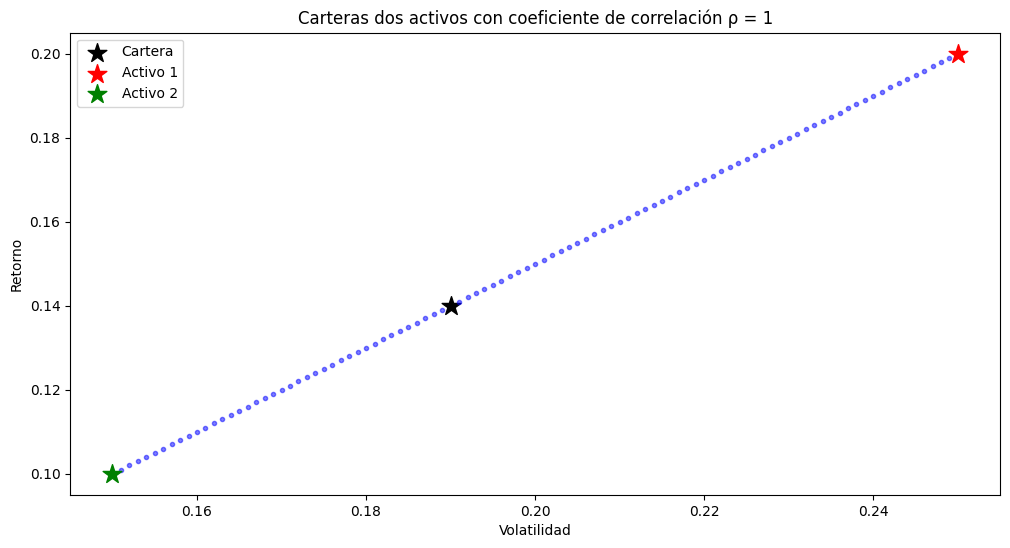

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))

pesos = np.linspace(
    0, 1, 101
)  # generamos 100 puntos entre 0 y 1 que representan los pesos del activo 1

for w in pesos:
    # Peso activo 1
    w1 = w
    # Peso activo 2
    w2 = 1 - w
    # calculamos el retorno de la cartera para cada peso
    retw = calc_ret_cartera(w1=w1, w2=w2, r1=ret1, r2=ret2)
    # calculamos la volatilidad de la cartera para cada peso
    stdw = calc_std_cartera(w1=w1, w2=w2, std1=std1, std2=std2, rho=coef_corr)
    if w == p1:
        plt.scatter(
            stdw, retw, color="black", marker="*", s=200, label="Cartera"
        )  # marcamos el punto de la cartera
    else:
        plt.scatter(
            stdw, retw, marker=".", color="blue", alpha=0.5
        )  # marcamos el resto de puntos

plt.scatter(
    std1, ret1, color="red", marker="*", s=200, label="Activo 1"
)  # marcamos el punto del activo 1
plt.scatter(
    std2, ret2, color="green", marker="*", s=200, label="Activo 2"
)  # marcamos el punto del activo 2

plt.xlabel("Volatilidad")
plt.ylabel("Retorno")
plt.title("Carteras dos activos con coeficiente de correlación \u03C1 = 1")
plt.legend()
plt.show()

---

Vamos a construir carteras a partir de las rentabilidades de dos activos que descargamos.

In [81]:
# Para descargar desde github

file_path = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python/refs/heads/Feb-2025/Tema_1_Activos_Intro/data/precios_corr_pos.csv"
precios_pos_df = pd.read_csv(file_path, index_col=0, parse_dates=True)
precios_pos_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,113.192375,156.263037
2010-01-06,111.121152,155.307702
2010-01-07,107.084666,153.467719
2010-01-08,105.076790,152.540900


In [82]:
# Descargar los precios de los activos
precios_pos_df = pd.read_csv(
    "../data/precios_corr_pos.csv", index_col=0, parse_dates=True
)
precios_pos_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,113.192375,156.263037
2010-01-06,111.121152,155.307702
2010-01-07,107.084666,153.467719
2010-01-08,105.076790,152.540900


In [83]:
# Calcular los retornos logarítmicos de los precios
retornos_pos_df = np.log(precios_pos_df).diff().dropna()

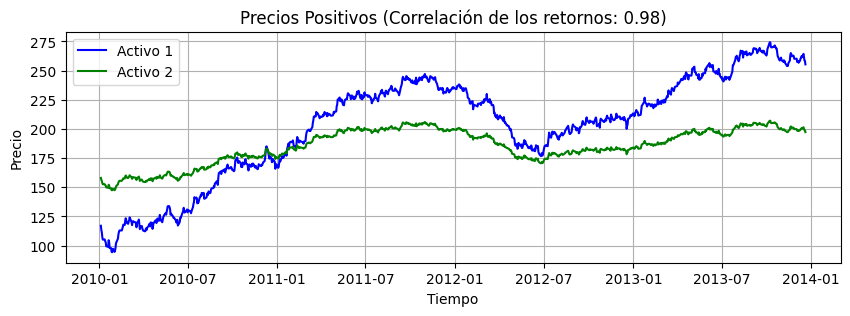

In [84]:
# Graficar precios_pos_df y mostrar coeficiente de correlación en el título
plt.figure(figsize=(10, 3))
corr_pos = retornos_pos_df.corr().iloc[0, 1]
plt.plot(precios_pos_df["Activo 1"], label="Activo 1", color="blue")
plt.plot(precios_pos_df["Activo 2"], label="Activo 2", color="green")
plt.title(f"Precios Positivos (Correlación de los retornos: {corr_pos:.2f})")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()

Como se ve en la figura, tener una **correlación positiva** implica que cuando un activo sube, el otro también sube y viceversa, es decir, están altamente correlados positivamente. 

---

Vamos a generar 1000 carteras aleatorias y a representarlas gráficamente.

In [85]:
# Función para calcular rentabilidad y riesgo de un activo individual
def asset_performance(returns):
    return returns.mean(), returns.std()

In [86]:
# Función para calcular retornos, rentabilidad y riesgo de la cartera
def portfolio_performance(weights, returns):
    # (999, 2) @ (2, 1000) -> (999, 1000)
    portfolio_returns = returns @ weights.T
    expected_portfolio_returns = portfolio_returns.mean(axis=0)  # Media de los retornos
    # Matriz de covarianzas -> (2, 2)
    cov_matrix = returns.cov()
    # (1000, 2) @ (2, 2) @ (2, 1000) -> (1000, 1000)
    portfolio_risk = np.sqrt(np.diag(weights @ cov_matrix @ weights.T))

    return expected_portfolio_returns, portfolio_risk

In [87]:
def portfolio_performance(weights, returns):
    portfolio_returns = returns @ weights.T
    portfolio_risk = portfolio_returns.std(axis=0)
    expected_portfolio_returns = portfolio_returns.mean(axis=0)

    return expected_portfolio_returns, portfolio_risk

In [88]:
# Función para graficar en un eje específico
def plot_on_axis(
    ret_mean,
    ret_std,
    asset1_mean,
    asset1_std,
    asset2_mean,
    asset2_std,
    color,
    marker,
    label,
    corr,
):
    plt.scatter(ret_std, ret_mean, c=color, marker=marker, alpha=0.4, label=label)
    plt.scatter(asset1_std, asset1_mean, c="red", marker="*", s=150, label="Activo 1")
    plt.scatter(asset2_std, asset2_mean, c="green", marker="*", s=150, label="Activo 2")
    plt.title(f"{label} (Correlación: {corr:.2f})")
    plt.xlabel("Riesgo (Desviación Estándar)")
    plt.ylabel("Rentabilidad (Retorno Medio)")
    plt.legend(loc="upper left")
    plt.grid(True)

In [89]:
# Generar pesos aleatorios
num_portfolios = 1000
rng = np.random.default_rng(seed=42)
weights = rng.random(size=(num_portfolios, 2))
weights = weights / np.sum(
    weights, axis=1, keepdims=True
)  # Normalizar para que la suma sea 1
weights.shape

(1000, 2)

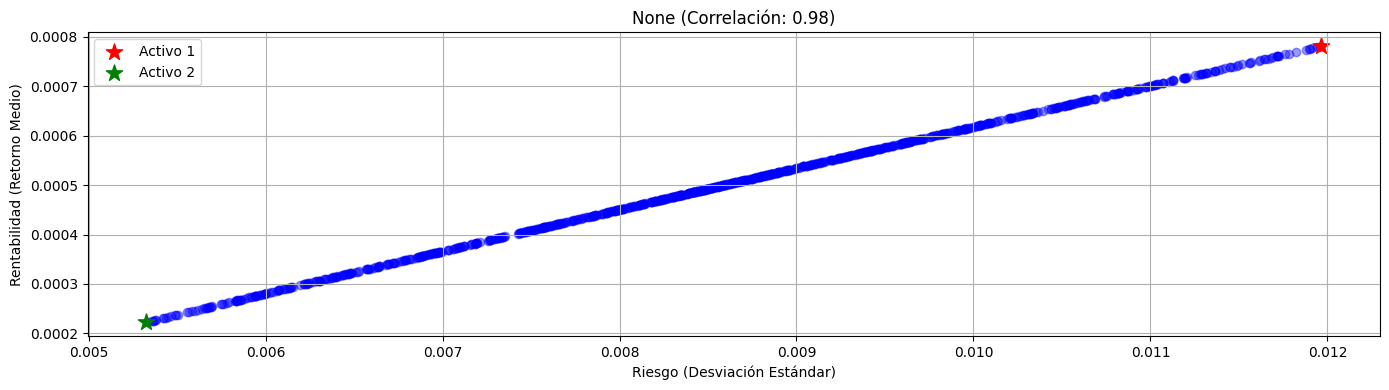

In [ ]:
asset1_pos_mean, asset1_pos_std = asset_performance(retornos_pos_df["Activo 1"])
asset2_pos_mean, asset2_pos_std = asset_performance(retornos_pos_df["Activo 2"])


ret_pos_mean, ret_pos_std = portfolio_performance(weights, retornos_pos_df)
# Inicializar figura y ejes
plt.figure(figsize=(14, 4))
# Graficar en cada eje
plot_on_axis(
    ret_pos_mean,
    ret_pos_std,
    asset1_pos_mean,
    asset1_pos_std,
    asset2_pos_mean,
    asset2_pos_std,
    "blue",
    "o",
    None,
    corr_pos,
)

plt.tight_layout()

plt.show()

---

### Caso 2:  
$\quad \rho_{12} = -1$

* Si $\rho_{12} = -1$ se dice que los activos son **perfectamente pero negativamente** correlacionados.

    - Hay máximos beneficios de diversificación.

    - La rentabilidad de la cartera es igual (recordad que no depenede de las relaccciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = |w_1 \sigma_1 - w_2 \sigma_2| \quad $    OJO: valor absoluto porque el resultado debe ser positivo
        
     
Demostración de la estimación de la volatilidad:

- $cov(\tilde R_1, \tilde R_2) = -1 \times \sigma(\tilde R_1) \sigma(\tilde R_2)$
    
- $\sigma_P² = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 - 2 w_1 w_2 \sigma_1 \sigma_2 = (w_1\sigma_1 - w_2\sigma_2)^2$


In [93]:
# definimos el coeficiente de correlación
coef_corr_neg = -1

In [94]:
# calculamos la rentabilidad y volatilidad de la cartera con el nuevo coeficiente de correlación
print(f"El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %")
print(
    f"La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %"
)

El retorno de la cartera es:14.00 %
La volatilidad de la cartera es:1.00 %


Recordad que con $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

y con el $\rho_{12}=-1$ y nos ha dado:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 1$%

Gracias a la **diversificación**, obtenemos la misma rentabilidad pero **menor volatilidad**.

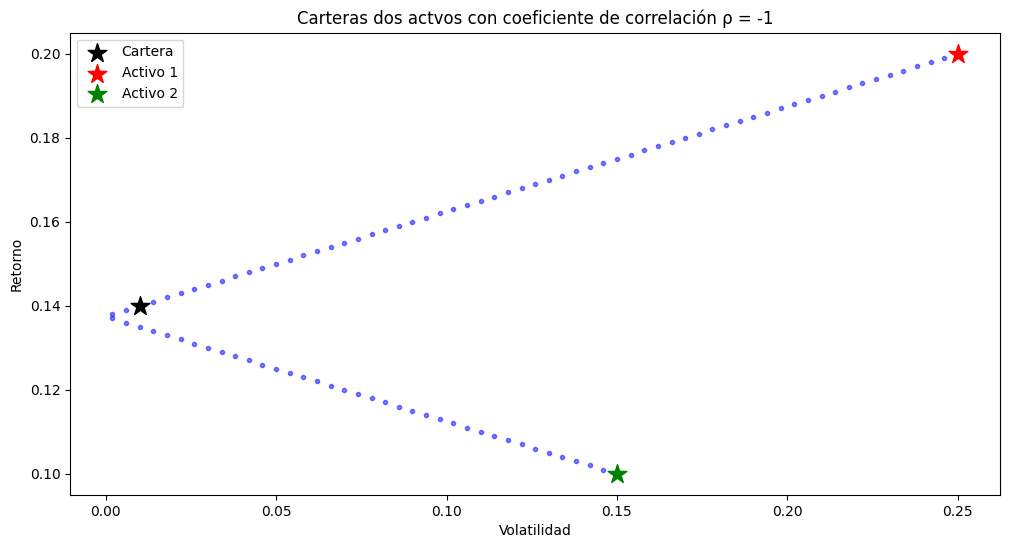

In [ ]:
pesos = np.linspace(
    0, 1, 101
)  # generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1



fig, ax = plt.subplots(figsize=(12, 6))



for w in pesos:
    retw = calc_ret_cartera(
        w, 1 - w, ret1, ret2
    )  # calculamos el retorno de la cartera para cada peso
    stdw = calc_std_cartera(
        w, 1 - w, std1, std2, coef_corr_neg
    )  # calculamos la volatilidad de la cartera para cada peso
    if w == p1:
        plt.scatter(
            stdw, retw, color="black", marker="*", s=200, label="Cartera"
        )  # marcamos el punto de la cartera
    else:
        plt.scatter(
            stdw, retw, color="blue", marker=".", alpha=0.5
        )  # marcamos el resto de puntos



plt.scatter(
    std1, ret1, color="red", marker="*", s=200, label="Activo 1"
)  # marcamos el punto del activo 1
plt.scatter(
    std2, ret2, color="green", marker="*", s=200, label="Activo 2"
)  # marcamos el punto del activo 2



plt.xlabel("Volatilidad")
plt.ylabel("Retorno")
plt.title("Carteras dos actvos con coeficiente de correlación \u03C1 = -1")
plt.legend()
plt.show()

---

Vamos a construir carteras a partir de las rentabilidades de dos activos que descargamos.

In [96]:
file_path = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python/refs/heads/Feb-2025/Tema_1_Activos_Intro/data/precios_corr_neg.csv"
precios_neg_df = pd.read_csv(file_path, index_col=0, parse_dates=True)
precios_neg_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,113.169161,159.774582
2010-01-06,111.074723,160.767536
2010-01-07,107.015024,162.645138
2010-01-08,104.983933,163.609577


In [97]:
precios_neg_df = pd.read_csv(
    "../data/precios_corr_neg.csv", index_col=0, parse_dates=True
)


precios_neg_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,113.169161,159.774582
2010-01-06,111.074723,160.767536
2010-01-07,107.015024,162.645138
2010-01-08,104.983933,163.609577


In [98]:
# Calcular los retornos logarítmicos para precios_neg_df
retornos_neg_df = np.log(precios_neg_df).diff().dropna()

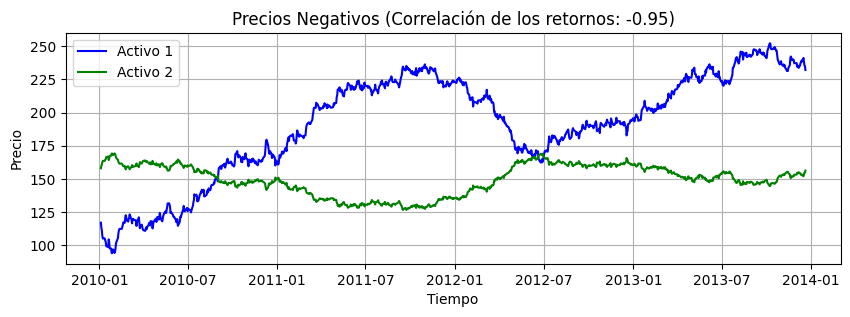

In [99]:
# Graficar precios_pos_df y mostrar coeficiente de correlación en el título
plt.figure(figsize=(10, 3))
corr_neg = retornos_neg_df.corr().iloc[0, 1]
plt.plot(precios_neg_df["Activo 1"], label="Activo 1", color="blue")
plt.plot(precios_neg_df["Activo 2"], label="Activo 2", color="green")
plt.title(f"Precios Negativos (Correlación de los retornos: {corr_neg:.2f})")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()

Claramente podemos ver qué significa tener una **correlación negativa**. Cuando un activo sube, el otro baja, es decir, tienen un comportamiento opuesto. Vamos a generar 1000 carteras aleatorias.

In [ ]:
# Generar pesos aleatorios
num_portfolios = 1000
rng = np.random.default_rng(seed=42)
weights = rng.random(size=(num_portfolios, 2))
weights = weights / np.sum(
    weights, axis=1, keepdims=True
)  # Normalizar para que la suma sea 1

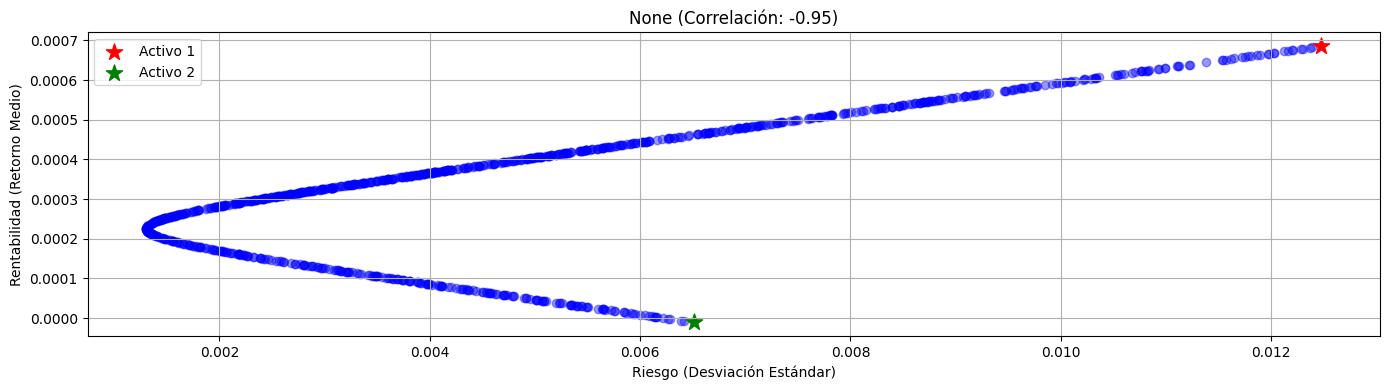

In [101]:
asset1_neg_mean, asset1_neg_std = asset_performance(retornos_neg_df["Activo 1"])
asset2_neg_mean, asset2_neg_std = asset_performance(retornos_neg_df["Activo 2"])

ret_neg_mean, ret_neg_std = portfolio_performance(weights, retornos_neg_df)

# Inicializar figura y ejes
plt.figure(figsize=(14, 4))

# Graficar en cada eje
plot_on_axis(
    ret_neg_mean,
    ret_neg_std,
    asset1_neg_mean,
    asset1_neg_std,
    asset2_neg_mean,
    asset2_neg_std,
    "blue",
    "o",
    None,
    corr_neg,
)
plt.tight_layout()
plt.show()

---

### Caso 3: $\quad$    $-1\leq \rho_{12} \leq 1$

* Si $-1 \leq \rho_{12} \leq 1$ se dice que los activos tienen correlación **lineal no perfecta**.

    - Hay beneficios de diversificación, a mayor correlación negativa mayor beneficio.

    - La rentabilidad de la cartera es igual (recordad que no depende de las relaciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        
    - La varianza de la cartera es igual a:
        - $\sigma²(\tilde R_p)= \underset{Activo 1} {\underbrace{w_1²\sigma²(\tilde R_1)}}+\underset{Activo 2} {\underbrace{w_2²\sigma²(\tilde R_2)}}+ \underset{Relacion\ entre\ activos} {\underbrace{2w_1w_2 \rho_{12} \sigma_1 \sigma_2}}$
        $$$$

    - La volatilidad de la cartera es igual a la raiz cuadrada de la varianza.
        - $\sigma(\tilde R_p)= \sqrt{w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2} $

        

In [102]:
x = np.linspace(0, 1, 101)
coef_corr_lst = [-1, -0.8, -0.5, 0, 0.5, 1]

# Definir un mapa de colores basado en coef_corr_lst
# colors = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#f0f921'] # con amarillos
colors = ["#440154", "#3b528b", "#21918c", "#5ec962", "#3366CC", "#FF6633"]

# Ajustar el tamaño de la
layout_width = 1200  # Ancho en píxeles
layout_height = 700  # Altura en píxeles

# Crear la figura de plotly
fig = go.Figure()

for idx, coef_corr_i in enumerate(coef_corr_lst):
    ret_lst = []
    std_lst = []

    for i in x:
        reti = calc_ret_cartera(i, 1 - i, ret1, ret2)
        stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr_i)

        ret_lst.append(reti)
        std_lst.append(stdi)

    fig.add_trace(
        go.Scatter(
            x=std_lst,
            y=ret_lst,
            mode="markers",
            name=f"Corr {coef_corr_i}",
            marker=dict(color=colors[idx], size=8, opacity=0.5),
        )
    )

# Añadir puntos de activos individuales
fig.add_trace(
    go.Scatter(
        x=[std1],
        y=[ret1],
        mode="markers",
        marker=dict(color="red", size=20, symbol="star"),
        name="Activo 1",
    )
)
fig.add_trace(
    go.Scatter(
        x=[std2],
        y=[ret2],
        mode="markers",
        marker=dict(color="green", size=20, symbol="star"),
        name="Activo 2",
    )
)

# Configurar títulos y etiquetas

title_font_size = 20  # Tamaño de fuente del título

fig.update_layout(
    title="Cartera de dos activos variando el coeficiente de correlación",
    font=dict(size=title_font_size),
    title_x=0.5,
    # xanchor='center',
    xaxis_title="Volatilidad",
    yaxis_title="Retorno",
)

# Mostrar el gráfico
fig.show()

---

Vamos a construir carteras a partir de las rentabilidades de dos activos que descargamos.

In [103]:
# Para leer datos desde github

file_path = "https://raw.githubusercontent.com/alfonso-santos/microcredencial-carteras-python/refs/heads/Feb-2025/Tema_1_Activos_Intro/data/precios_corr_cero.csv"
precios_cero_df = pd.read_csv(file_path, index_col=0, parse_dates=True)
precios_cero_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,120.993339,158.417089
2010-01-06,123.250277,160.666274
2010-01-07,127.472476,159.712392
2010-01-08,129.666067,159.580555


In [104]:
precios_cero_df = pd.read_csv(
    "../data/precios_corr_cero.csv", index_col=0, parse_dates=True
)


precios_cero_df.head()

,Activo 1,Activo 2
2010-01-04,117.000000,158.000000
2010-01-05,120.993339,158.417089
2010-01-06,123.250277,160.666274
2010-01-07,127.472476,159.712392
2010-01-08,129.666067,159.580555


In [105]:
# Calcular los retornos logarítmicos para precios_cero_df
retornos_cero_df = np.log(precios_cero_df).diff().dropna()

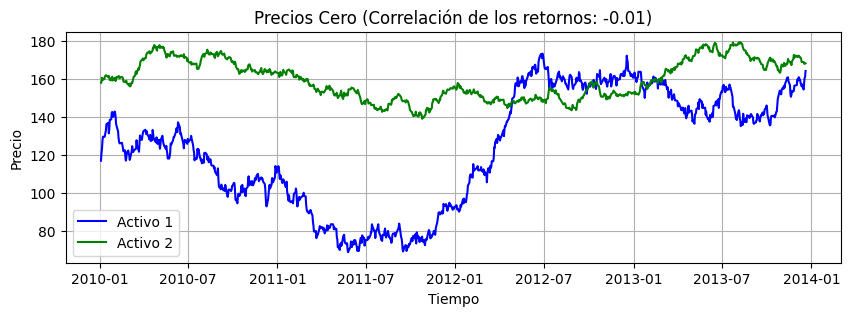

In [106]:
# Graficar precios_pos_df y mostrar coeficiente de correlación en el título
plt.figure(figsize=(10, 3))
corr_cero = retornos_cero_df.corr().iloc[0, 1]
plt.plot(precios_cero_df["Activo 1"], label="Activo 1", color="blue")
plt.plot(precios_cero_df["Activo 2"], label="Activo 2", color="green")
plt.title(f"Precios Cero (Correlación de los retornos: {corr_cero:.2f})")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()

Como vemos en la figura, dos activos tienen **poca correlación** (ya sea positiva o negativa) cuando no hay relación en el comportamiento de los dos activos. Cuando uno sube, no podemos afirmar que el otro suba o baje. Vamos a generar, una vez más, 1000 carteras aleatorias.

In [ ]:
# Generar pesos aleatorios
num_portfolios = 1000  #
rng = np.random.default_rng(seed=42)
weights = rng.random(size=(num_portfolios, 2))
weights = weights / np.sum(
    weights, axis=1, keepdims=True
)  # Normalizar para que la suma sea 1

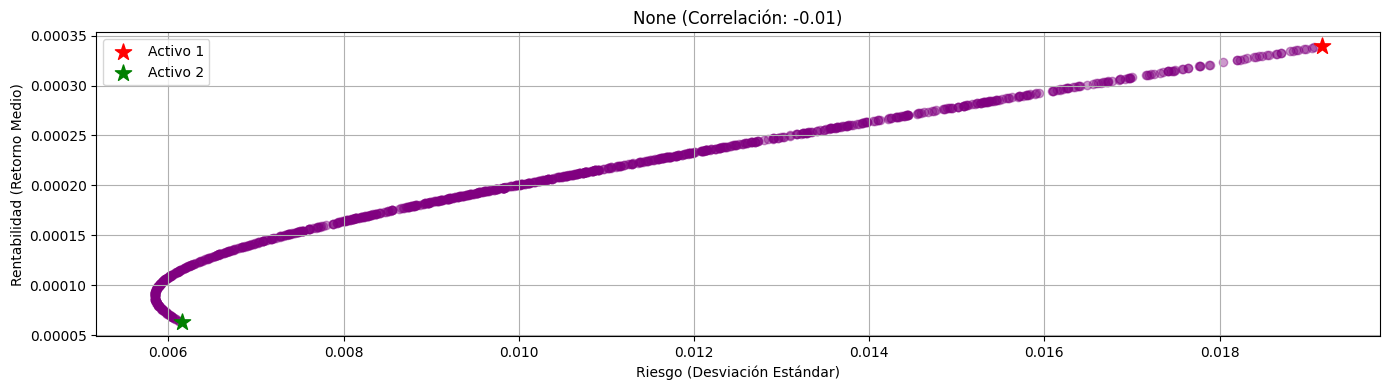

In [108]:
asset1_cero_mean, asset1_cero_std = asset_performance(retornos_cero_df["Activo 1"])
asset2_cero_mean, asset2_cero_std = asset_performance(retornos_cero_df["Activo 2"])

ret_cero_mean, ret_cero_std = portfolio_performance(weights, retornos_cero_df)

# Inicializar figura y ejes
plt.figure(figsize=(14, 4))

# Graficar en cada eje
plot_on_axis(
    ret_cero_mean,
    ret_cero_std,
    asset1_cero_mean,
    asset1_cero_std,
    asset2_cero_mean,
    asset2_cero_std,
    "purple",
    "o",
    None,
    corr_cero,
)
plt.tight_layout()
plt.show()

## 2. Cálculo de la cartera de mínima volatilidad

Vamos a calcular la cartera de mínima varianza:

* Partimos de la fórmula de la varianza de la cartera:

    - $\sigma^2_p= w_1^2\sigma^2_1+w_2^2\sigma^2_2+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2 $
    $$$$

* Calculamos la derivada respecto de $w_1$, sustituimos $w_2=1-w_1$ e igualamos a 0:

    - $\dfrac{\partial \sigma^2_p}{\partial w_1}= 2w_1\sigma^2_1 - 2(1-w_1)\sigma^2_2 + 2(1-2w_1) \rho_{12} \sigma_1 \sigma_2 = 0$
    $$$$

* Despejamos $w_1$:

    - $w_1 = \dfrac{\sigma_2²-\rho_{12} \sigma_1 \sigma_2}{\sigma_1²+\sigma_2²-2 \rho_{12} \sigma_1 \sigma_2}$
    


  



En el caso de dos activos con correlación $\rho_{12} = -1$:

* $w_1 = \dfrac{\sigma_2²+\sigma_1 \sigma_2}{\sigma_1²+\sigma_2²+2 \sigma_1 \sigma_2} = \dfrac{\sigma_2(\sigma_1+\sigma_2)}{(\sigma_1+\sigma_2)²} = \dfrac{\sigma_2}{\sigma_1+\sigma_2}$

Si lo aplicamos al ejemplo de la cartera con dos activos que hemos estado usando:

In [109]:
p1 = std2 / (std1 + std2)
p2 = 1 - p1
print(f"El peso del activo 1 es: {100*p1:.2f}%")
print(f"El peso del activo 2 es: {100*p2:.2f}%")

El peso del activo 1 es: 37.50%
El peso del activo 2 es: 62.50%


In [110]:
# calculamos la rentabilidad y volatilidad de la cartera con los nuevos pesos
print(f"El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %")
print(
    f"La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %"
)

El retorno de la cartera es:13.75 %
La volatilidad de la cartera es:0.00 %


**CONCLUSIONES**

Recordad que con los pesos iniciales y $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

Y hemos visto que con $\rho_{12}=-1$ y la fórmula de la cartera de mínima varianza nos ha dado:

* $E(\tilde R_p) = 13.75$%

* $\sigma_p = 0$%

Gracias a la **diversificación**, obtenemos casi la misma rentabilidad pero **sin riesgo**.

## EJERCICIO


Bájate la información de Telefónica y del Banco Santander de los años 2022 y 2023 y haz los siguientes apartados:

1- Genera 100 carteras modificando el peso en el activo 1 con saltos de 0.01 y dibuja la gráfica en el plano rentabilidad-riesgo de todas las carteras y de los dos activos.

2- Crea la cartera de volatilidad mínima e inclúyela en la gráfica que has generado antes.

3- Compara la rentabilidad, volatilidad, asimetría y kurtosis de los activos y de la cartera.

In [111]:
activos = ["TEF", "SAN"]

precios = yf.download(
    activos,
    start="2022-01-01",
    end="2024-01-01",
    auto_adjust=False,
    multi_level_index=False,
)["Adj Close"]
precios.head()

[*********************100%***********************]  2 of 2 completed


Ticker,SAN,TEF
Date,,
2022-01-03,2.965228,3.570770
2022-01-04,3.027004,3.545972
2022-01-05,3.000529,3.512909
2022-01-06,3.124080,3.587301
2022-01-07,3.159380,3.628629


In [112]:
retornos = np.log(precios).diff().dropna()
retornos.head()

Ticker,SAN,TEF
Date,,
2022-01-04,0.020619,-0.006969
2022-01-05,-0.008785,-0.009368
2022-01-06,0.040351,0.020955
2022-01-07,0.011236,0.011455
2022-01-10,0.002789,0.022523


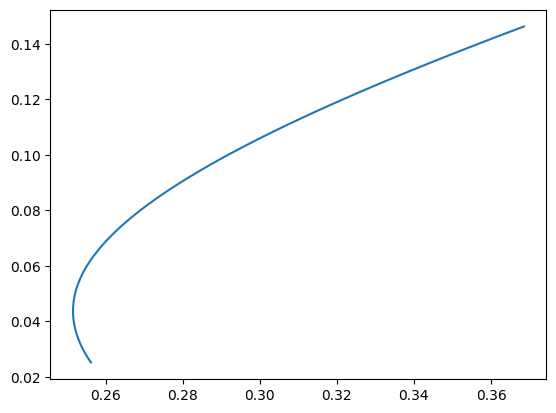

In [113]:
pesos = np.linspace(0, 1, 101)
means = []
stds = []
for w1 in pesos:
    w2 = 1 - w1
    pesos = np.array([w1, w2])
    retornos_cartera = retornos @ pesos
    mean = retornos_cartera.mean()
    std = retornos_cartera.std()
    means.append(mean)
    stds.append(std)

means = np.array(means)
stds = np.array(stds)
plt.plot(stds * np.sqrt(252), means * 252, "-")
plt.show()

$w_1 = \dfrac{\sigma_2²-\rho_{12} \sigma_1 \sigma_2}{\sigma_1²+\sigma_2²-2 \rho_{12} \sigma_1 \sigma_2}$

In [114]:
# 2- Crea la cartera de volatilidad mínima
std1 = retornos.std()["SAN"]
std2 = retornos.std()["TEF"]
rho = retornos.corr().iloc[0, 1]

w1 = (std2**2 - rho * std1 * std2) / (std1**2 + std2**2 - 2 * rho * std1 * std2)
w2 = 1 - w1
pesos = np.array([w1, w2])
pesos

array([0.15293861, 0.84706139])

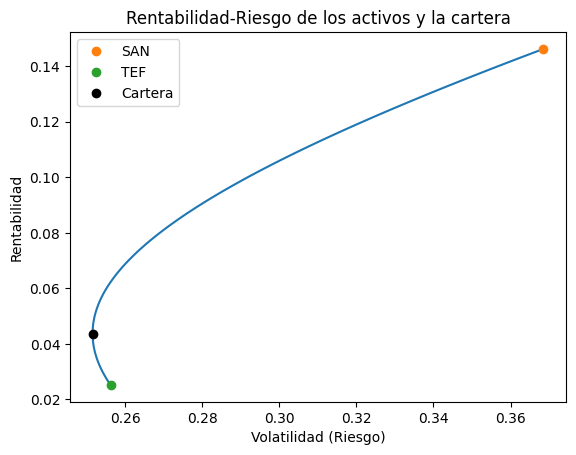

In [115]:
# 3- Haz una gráfica de los dos activos y de la cartera en el plano rentabilidad-riesgo

retornos_cartera = retornos @ pesos

mean1 = retornos.mean()["SAN"]
mean2 = retornos.mean()["TEF"]
mean_cartera = retornos_cartera.mean()
std_cartera = retornos_cartera.std()


plt.plot(stds * np.sqrt(252), means * 252, "-")
plt.plot(std1 * np.sqrt(252), mean1 * 252, "o", label="SAN")
plt.plot(std2 * np.sqrt(252), mean2 * 252, "o", label="TEF")
plt.plot(
    std_cartera * np.sqrt(252), mean_cartera * 252, "o", color="black", label="Cartera"
)
plt.title("Rentabilidad-Riesgo de los activos y la cartera")
plt.xlabel("Volatilidad (Riesgo)")
plt.ylabel("Rentabilidad")
plt.legend()
plt.show()

In [116]:
# 4- Compara la rentabilidad, volatilidad, asimetría y kurtosis de los activos y de la cartera
retornos_all = retornos.copy()
retornos_all["Cartera"] = retornos_cartera
retornos_all

Ticker,SAN,TEF,Cartera
Date,,,
2022-01-04,0.020619,-0.006969,-0.002750
2022-01-05,-0.008785,-0.009368,-0.009279
2022-01-06,0.040351,0.020955,0.023922
2022-01-07,0.011236,0.011455,0.011421
2022-01-10,0.002789,0.022523,0.019505
...,...,...,...
2023-12-22,0.009662,-0.002528,-0.000664
2023-12-26,0.004796,0.005051,0.005012
2023-12-27,0.002390,-0.007585,-0.006060


In [117]:
retornos_all.mean() * 252

Ticker
SAN        0.146241
TEF        0.025202
Cartera    0.043714
dtype: float64

In [118]:
retornos_all.std() * np.sqrt(252)

Ticker
SAN        0.368535
TEF        0.256220
Cartera    0.251563
dtype: float64

In [119]:
retornos_all.skew()

Ticker
SAN       -0.219881
TEF       -0.390139
Cartera   -0.353231
dtype: float64

In [120]:
retornos_all.kurtosis()

Ticker
SAN        1.443764
TEF        2.232900
Cartera    1.871881
dtype: float64